#Run all

##Deep Computer Vision

Perform image classification and object detection/recognition using deep computer vision with something called convulutional neural network.

The goal of our convulutional neural networks will be classify and detect images or specific objects from within the image.
  - image data as our features
  - label for those images as our label or output
      -how neural network works
        -image data
        -convulutional layer
        -pooling layer
        -CNN Architecture

##Image Data
  - data has 1 or 2 dimensions
    - image data has 3 dimentions
      -- image height
      -- image width
      -- color channels
  The only item in the list you may not understand is the color channels.
  The number of color channels represents the depth of an image and coorelates to colors it used.
    example:
      for an image of color depth 1 = graysclae image (1,1,1)

## Coding

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import random
from sklearn.manifold import TSNE
import seaborn as sns
import plotly.express as px
import torch.optim as optim
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.manifold import TSNE
import seaborn as sns
import plotly.express as px
import cv2 #pip install opencv-python
import urllib

##Variational Autoencoder implementation (VAE)
- type of artificial intelligence model used for learning and generating new data

-- autoencoder
  - type of neural network designed for learning efficient representation of data
  - it consists of an encoder, which compress the input data into a smaller simplified representation, and a decoder, which reconstructs the original data from this representation

-- variational
  - it refers to the use of probability distribution to generate data

-- implementation involves setting up a neural network architecture with two main components: an encoder and a decoder
  - encoder takes in the input data and maps it to a probability distribution in a reduced-dimensional space
  - decoder then samples from this distribution and reconstruct the original input



##Stepwise (Step by Step)

In [ ]:
#utf-8 unicode transformation format - 8 bits
class VariationalAutoencoder(nn.Module):
  def __init__(self, num_features=8, num_dim=784):
    super(VariationalAutoencoder, self).__init__()

    self.num_features = num_features
    self.num_dim = num_dim #Dimensions/number of input

    self.encoder_layer_1 = nn.Linear(in_features = self.num_dim, out_features=512)
    self.encoder_layer_2 = nn.Linear(in_features = 512, out_features=(self.num_features * 2))

    self.decoder_layer_1 = nn.Linear(in_features = self.num_features, out_features=512)
    self.decoder_layer_2 = nn.Linear(in_features = 512, out_features=self.num_dim)

  def reparameterize(self, mu, log_var):
    '''
        !param mu: mean from endocer's latent space
        !param log_var: log variance from encoders's latent space
    '''
    std = torch.exp(0.5 * log_var)#standard deviation
    eps = torch.randn_like(std)#randn_like as same we need the same size
    sample = mu +(eps*std)

    return sample

  def sample(self, x):
    encoded_x, mu, log_var = self.encode(x)

    generated_sample = self.decode(encoded_x, mu, log_var)

    return generated_sample

  def encode(self, x):
    #encoding
    '''
    relu - Rectified linear unit (activation function to the output of the
    first linear layer)

    relu is a simple mathematical function that introduces non-linearity to the network
    '''
    x = F.relu(self.encoder_layer_1(x))
    x = self.encoder_layer_2(x).view(-1, 2, self.num_features)
    #-1 in the view() -1 serve as a placeholder on the size of the input tensor
    #2 by default the second dimention is set to 2

    #get mu and log_var
    mu = x[:, 0, :] #the first feature as mean
    log_var = x[:, 1, :]#the other feature values as variance

    #get the latent vector through reparameterization
    z = self.reparameterize(mu, log_var)

    return z, mu, log_var

  def decode(self, z, mu, log_var):
    #decoding
    x = F.relu(self.decoder_layer_1(z))
    reconstruction = torch.sigmoid(self.decoder_layer_2(x))

    return reconstruction, mu, log_var

  def sample(self, mu, log_var):
    z = self.reparameterize(mu, log_var)
    reconstruction, mu, log_var = self.decode(z, mu, log_var)

    return reconstruction

  def forward(self, x):
    z, mu, log_var = self.encode(x)
    reconstruction, mu, log_var = self.decode(z, mu, log_var)

    return reconstruction, mu, log_var



##Custom Dataset

In [ ]:
class AutoencoderDataset(Dataset):
  def __init__(self, x):
    self.x = x

    self.n_samples = len(x)

  def __getitem__(self, index):
    return self.x[index], self.x[index]

  def __len__(self):
    return self.n_samples

##Bongo(Dog) Images

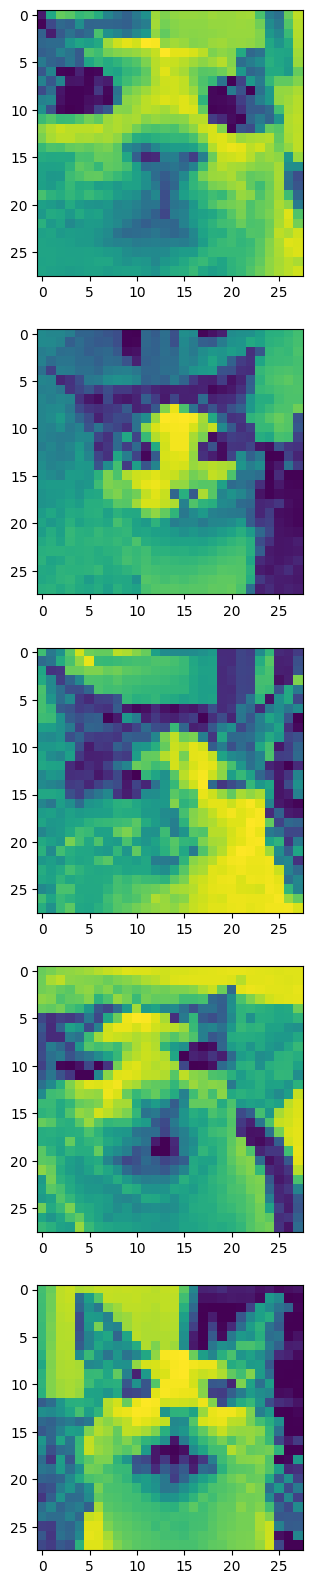

In [ ]:
img_width = 28
img_height = 28

dim = (img_width, img_height)

luna = [
    "https://i.pinimg.com/736x/d4/7d/83/d47d83b04f22bde6788ca42761e6ccda.jpg",
    "https://www.famousbirthdays.com/headshots/crunchy-cat-luna-4.jpg",
    "https://www.famousbirthdays.com/headshots/crunchy-cat-luna-2.jpg",
    "https://i.pinimg.com/originals/ab/78/aa/ab78aabc7191731a6c5d94f3ae7d3bf0.jpg",
    "https://www.famousbirthdays.com/headshots/crunchy-cat-luna-9.jpg"
]

images = []

for luna_url in luna:
  req = urllib.request.urlopen(luna_url)
  luna = np.asarray(bytearray(req.read()))
  luna = cv2.imdecode(luna, -1) #image decpde
  luna = cv2.cvtColor(luna, cv2.COLOR_BGR2GRAY) #convert color to grayscale 1 channel
  #img = read as grayscale 1 channel images and normalize
  img = luna / 255

  img = cv2.resize(img, dim)
  images.append(img)

num_images = len(images)
num_cols = 1

col_names = [
    "Original"
]

fig, axes = plt.subplots(nrows = num_images, ncols = num_cols,
                         figsize = (num_cols*4, num_images*4))
counter = 0

for img in images:
  counter += 1
  plt.subplot(len(images),num_cols, counter)
  plt.imshow(img)

##Assignment
Try your model to form different shape using 5 different images of flowers, cats, or any image

## 310124 - S02

In [ ]:
data = []

#ravel() function in numpy used to flatten a multi-dimensional array into a one-dimensional array

for img in images:
  data.append(img.ravel())
np.array(data).shape

(5, 784)

In [ ]:
#Create a feature vector in images
x = torch.Tensor(np.array(data))
#np.array(data) it converts the list data which contains flattened image data into a
#x = torch.Tensor(np.array(data)) converts the numpy array into a pytorch. A tensor
#is a multi-dimensional array that can be used for numerical computation in Pytorch
x

tensor([[0.0745, 0.5672, 0.7277,  ..., 0.8275, 0.8549, 0.8824],
        [0.4246, 0.4078, 0.4077,  ..., 0.0667, 0.0848, 0.0699],
        [0.6510, 0.3882, 0.4822,  ..., 0.9120, 0.9168, 0.8818],
        [0.7279, 0.7516, 0.7826,  ..., 0.1368, 0.0504, 0.3337],
        [0.6510, 0.7132, 0.8364,  ..., 0.2026, 0.0050, 0.0039]])

In [ ]:
#setup configuration for training

device = 'cpu'
learning_rate = 0.001 #default is 0.001 | hyperparameter
epochs = 100 #per 100/ assume that dataset has 100x training process | hyperparameter
#epochs refers to the number of times the entire training dataset is processed by learning algorithm
batch_size = 1 #hyperparameter
num_features = 8 #features of img
num_dim = 784

model = VariationalAutoencoder(num_features = num_features, num_dim = num_dim)
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
'''
  criterion - its purpose is to adjust the model's parameters in order to minimize the loss in prediction
  optim.Adam refers to the Adam optimizer, one of the popular optimization algorithm
  used in machine learning by combining the ideas from two other optimization algorithm

  model.parameter() it specifies which parameters of the model should be optimized
  The model's parameters are the internal values that the algo adjusts during training
  to make better predictions

  learning rate is the hyperparameter that determines the step size at which the
  optimizer adjusts the model parameters

  hyperparameter configuration - values we set before the training process start
    -is also a configuration setting external to a model that can't be learned from
  the data
    -- they are not learned during the training but are specified by the
    practitioner based on prior knowledge, experience, or tuning experiment
'''

'''
is to setup the criterion(loss function) for a binary classification problem using
Pytorch

nn.BCELoss this stands for Binary Cross Entropy Loss - it is commonly used loss
function for binary classification problem, it penalizes the model more when it
makes predictions that are far from actual binary labels (0,1)

reduction = 'sum' this parameter specifies how the individual losses each data
point should combine or aggregate
'''
criterion = nn.BCELoss(reduction = 'sum')

In [ ]:
'''
Loss Function

This function will add the reconstruction loss (BCELoss) and KL-Divergence
KL-Divergence = 0.5 * sum (1 + log(sigma^2) - mu^2 - sigma^2)
!param bce_loss: reconstruction loss
!param mu: the mean from the latent vector
!param logvar: log variance from the latent vector
'''
def final_loss(bce_loss, mu, logvar):
  BCE = bce_loss
  KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
  return BCE + KLD

In [ ]:
#preparation of dataset
train_ds = AutoencoderDataset(
    x = x
)

#loader is a function that trains a machine learning model using a dataset
train_loader = DataLoader(
  train_ds,
  batch_size = batch_size,
  shuffle = False,
  drop_last = False
)

In [ ]:
#train function

def train_fn(loader, model, optimizer, loss_fn):
  loop = tqdm(loader)

  ave_loss = 0.0
  count = 0 #per cycle

  for batch_idx, (data, targets) in enumerate(loop):
    data = data.to(device = device)
    targets = targets.to(device = device)

    #backward optimizer
    optimizer.zero_grad()

    reconstruction, mu, logvar = model.forward(data)

    bce_loss = criterion(reconstruction, data)

    loss = final_loss(bce_loss, mu, logvar)

    loss.backward()

    optimizer.step()

    #update tqdm
    loop.set_postfix(loss = loss.item())

    ave_loss += loss.item()
    count += 1

  ave_loss = ave_loss / count
  return ave_loss

In [ ]:
#perform training
losses = []

for epoch in range(epochs):
  print("Epoch: {}".format(epoch))
  ave_loss = train_fn(train_loader, model, optimizer, final_loss)
  print("Average Loss: {}".format(ave_loss))

  state = {
      "state dict": model.state_dict(),
      "optimizer": optimizer.state_dict()
  }
  torch.save(state, "autoencoder.pth")

  losses.append(ave_loss)

Epoch: 0


100%|██████████| 5/5 [00:00<00:00, 14.44it/s, loss=547]


Average Loss: 548.8007202148438
Epoch: 1


100%|██████████| 5/5 [00:00<00:00, 28.18it/s, loss=546]


Average Loss: 542.7228149414062
Epoch: 2


100%|██████████| 5/5 [00:00<00:00, 40.67it/s, loss=526]


Average Loss: 527.9385864257813
Epoch: 3


100%|██████████| 5/5 [00:00<00:00, 44.17it/s, loss=525]


Average Loss: 521.0033569335938
Epoch: 4


100%|██████████| 5/5 [00:00<00:00, 56.45it/s, loss=513]


Average Loss: 522.8328369140625
Epoch: 5


100%|██████████| 5/5 [00:00<00:00, 50.27it/s, loss=517]


Average Loss: 524.3920837402344
Epoch: 6


100%|██████████| 5/5 [00:00<00:00, 53.03it/s, loss=502]


Average Loss: 515.0957580566406
Epoch: 7


100%|██████████| 5/5 [00:00<00:00, 33.29it/s, loss=485]

Average Loss: 511.8318725585938
Epoch: 8



100%|██████████| 5/5 [00:00<00:00, 44.14it/s, loss=484]


Average Loss: 506.888916015625
Epoch: 9


100%|██████████| 5/5 [00:00<00:00, 34.23it/s, loss=483]


Average Loss: 502.7185913085938
Epoch: 10


100%|██████████| 5/5 [00:00<00:00, 54.62it/s, loss=470]


Average Loss: 489.93385620117186
Epoch: 11


100%|██████████| 5/5 [00:00<00:00, 55.24it/s, loss=461]


Average Loss: 483.63486328125
Epoch: 12


100%|██████████| 5/5 [00:00<00:00, 58.76it/s, loss=482]


Average Loss: 496.59758911132815
Epoch: 13


100%|██████████| 5/5 [00:00<00:00, 38.58it/s, loss=511]


Average Loss: 489.1161254882812
Epoch: 14


100%|██████████| 5/5 [00:00<00:00, 68.33it/s, loss=449]


Average Loss: 476.99244995117186
Epoch: 15


100%|██████████| 5/5 [00:00<00:00, 34.82it/s, loss=442]


Average Loss: 473.11631469726564
Epoch: 16


100%|██████████| 5/5 [00:00<00:00, 25.19it/s, loss=446]


Average Loss: 471.34417114257815
Epoch: 17


100%|██████████| 5/5 [00:00<00:00, 28.19it/s, loss=446]


Average Loss: 468.2982238769531
Epoch: 18


100%|██████████| 5/5 [00:00<00:00, 20.99it/s, loss=437]


Average Loss: 461.49656372070314
Epoch: 19


100%|██████████| 5/5 [00:00<00:00, 30.62it/s, loss=450]


Average Loss: 461.7006896972656
Epoch: 20


100%|██████████| 5/5 [00:00<00:00, 52.87it/s, loss=433]


Average Loss: 458.67665405273436
Epoch: 21


100%|██████████| 5/5 [00:00<00:00, 36.68it/s, loss=437]


Average Loss: 456.07317504882815
Epoch: 22


100%|██████████| 5/5 [00:00<00:00, 50.16it/s, loss=434]


Average Loss: 456.5343811035156
Epoch: 23


100%|██████████| 5/5 [00:00<00:00, 31.88it/s, loss=438]


Average Loss: 453.4192321777344
Epoch: 24


100%|██████████| 5/5 [00:00<00:00, 44.96it/s, loss=430]


Average Loss: 454.15692138671875
Epoch: 25


100%|██████████| 5/5 [00:00<00:00, 35.90it/s, loss=429]

Average Loss: 450.4970397949219


Epoch: 26


100%|██████████| 5/5 [00:00<00:00, 41.80it/s, loss=428]


Average Loss: 448.91717529296875
Epoch: 27


100%|██████████| 5/5 [00:00<00:00, 54.61it/s, loss=435]


Average Loss: 449.9706726074219
Epoch: 28


100%|██████████| 5/5 [00:00<00:00, 75.71it/s, loss=429]


Average Loss: 450.5588317871094
Epoch: 29


100%|██████████| 5/5 [00:00<00:00, 86.68it/s, loss=430]


Average Loss: 452.37864990234374
Epoch: 30


100%|██████████| 5/5 [00:00<00:00, 85.36it/s, loss=429]


Average Loss: 447.47877807617186
Epoch: 31


100%|██████████| 5/5 [00:00<00:00, 78.26it/s, loss=425]


Average Loss: 452.29766845703125
Epoch: 32


100%|██████████| 5/5 [00:00<00:00, 86.70it/s, loss=429]


Average Loss: 449.0539306640625
Epoch: 33


100%|██████████| 5/5 [00:00<00:00, 79.55it/s, loss=428]


Average Loss: 449.41135864257814
Epoch: 34


100%|██████████| 5/5 [00:00<00:00, 74.69it/s, loss=426]


Average Loss: 447.8047241210937
Epoch: 35


100%|██████████| 5/5 [00:00<00:00, 75.76it/s, loss=427]

Average Loss: 447.21043701171874


Epoch: 36


100%|██████████| 5/5 [00:00<00:00, 69.14it/s, loss=428]


Average Loss: 452.1369689941406
Epoch: 37


100%|██████████| 5/5 [00:00<00:00, 73.17it/s, loss=425]


Average Loss: 451.2176208496094
Epoch: 38


100%|██████████| 5/5 [00:00<00:00, 71.65it/s, loss=425]


Average Loss: 448.0199340820312
Epoch: 39


100%|██████████| 5/5 [00:00<00:00, 74.96it/s, loss=425]


Average Loss: 447.4529602050781
Epoch: 40


100%|██████████| 5/5 [00:00<00:00, 69.41it/s, loss=429]


Average Loss: 448.54212646484376
Epoch: 41


100%|██████████| 5/5 [00:00<00:00, 78.86it/s, loss=424]

Average Loss: 445.88433227539065


Epoch: 42


100%|██████████| 5/5 [00:00<00:00, 85.96it/s, loss=431]


Average Loss: 448.89927978515624
Epoch: 43


100%|██████████| 5/5 [00:00<00:00, 91.38it/s, loss=431]


Average Loss: 451.18059692382815
Epoch: 44


100%|██████████| 5/5 [00:00<00:00, 81.61it/s, loss=433]


Average Loss: 448.7778747558594
Epoch: 45


100%|██████████| 5/5 [00:00<00:00, 79.38it/s, loss=424]


Average Loss: 447.9693969726562
Epoch: 46


100%|██████████| 5/5 [00:00<00:00, 77.99it/s, loss=432]


Average Loss: 447.43935546875
Epoch: 47


100%|██████████| 5/5 [00:00<00:00, 78.78it/s, loss=429]


Average Loss: 452.22991943359375
Epoch: 48


100%|██████████| 5/5 [00:00<00:00, 71.37it/s, loss=423]

Average Loss: 446.635205078125


Epoch: 49


100%|██████████| 5/5 [00:00<00:00, 68.20it/s, loss=432]

Average Loss: 449.05919189453124


Epoch: 50


100%|██████████| 5/5 [00:00<00:00, 82.86it/s, loss=428]

Average Loss: 446.62257080078126


Epoch: 51


100%|██████████| 5/5 [00:00<00:00, 75.91it/s, loss=435]

Average Loss: 446.7331115722656


Epoch: 52


100%|██████████| 5/5 [00:00<00:00, 78.55it/s, loss=439]

Average Loss: 448.2143798828125


Epoch: 53


100%|██████████| 5/5 [00:00<00:00, 69.01it/s, loss=436]

Average Loss: 450.70892333984375


Epoch: 54


100%|██████████| 5/5 [00:00<00:00, 68.87it/s, loss=429]

Average Loss: 449.7469482421875


Epoch: 55


100%|██████████| 5/5 [00:00<00:00, 80.53it/s, loss=428]

Average Loss: 449.5899658203125


Epoch: 56


100%|██████████| 5/5 [00:00<00:00, 77.12it/s, loss=425]


Average Loss: 445.527197265625
Epoch: 57


100%|██████████| 5/5 [00:00<00:00, 81.58it/s, loss=424]


Average Loss: 445.2561279296875
Epoch: 58


100%|██████████| 5/5 [00:00<00:00, 80.06it/s, loss=429]


Average Loss: 446.14093017578125
Epoch: 59


100%|██████████| 5/5 [00:00<00:00, 54.23it/s, loss=424]

Average Loss: 452.76661987304686


Epoch: 60


100%|██████████| 5/5 [00:00<00:00, 71.07it/s, loss=426]


Average Loss: 444.5321899414063
Epoch: 61


100%|██████████| 5/5 [00:00<00:00, 59.60it/s, loss=425]

Average Loss: 450.3357727050781


Epoch: 62


100%|██████████| 5/5 [00:00<00:00, 59.15it/s, loss=433]


Average Loss: 449.4434875488281
Epoch: 63


100%|██████████| 5/5 [00:00<00:00, 61.37it/s, loss=446]


Average Loss: 455.6308837890625
Epoch: 64


100%|██████████| 5/5 [00:00<00:00, 69.32it/s, loss=424]


Average Loss: 449.37702026367185
Epoch: 65


100%|██████████| 5/5 [00:00<00:00, 57.02it/s, loss=433]


Average Loss: 451.38209838867186
Epoch: 66


100%|██████████| 5/5 [00:00<00:00, 62.28it/s, loss=428]


Average Loss: 455.96727294921874
Epoch: 67


100%|██████████| 5/5 [00:00<00:00, 52.00it/s, loss=451]


Average Loss: 451.0271728515625
Epoch: 68


100%|██████████| 5/5 [00:00<00:00, 57.34it/s, loss=437]


Average Loss: 450.7701110839844
Epoch: 69


100%|██████████| 5/5 [00:00<00:00, 65.51it/s, loss=431]


Average Loss: 448.8474365234375
Epoch: 70


100%|██████████| 5/5 [00:00<00:00, 69.25it/s, loss=428]


Average Loss: 448.4432067871094
Epoch: 71


100%|██████████| 5/5 [00:00<00:00, 66.80it/s, loss=429]


Average Loss: 446.94940795898435
Epoch: 72


100%|██████████| 5/5 [00:00<00:00, 70.90it/s, loss=429]


Average Loss: 447.6234619140625
Epoch: 73


100%|██████████| 5/5 [00:00<00:00, 70.28it/s, loss=428]


Average Loss: 446.794287109375
Epoch: 74


100%|██████████| 5/5 [00:00<00:00, 60.72it/s, loss=424]


Average Loss: 446.91944580078126
Epoch: 75


100%|██████████| 5/5 [00:00<00:00, 53.48it/s, loss=424]


Average Loss: 445.9056396484375
Epoch: 76


100%|██████████| 5/5 [00:00<00:00, 59.45it/s, loss=423]


Average Loss: 442.6300537109375
Epoch: 77


100%|██████████| 5/5 [00:00<00:00, 60.81it/s, loss=426]


Average Loss: 453.6649475097656
Epoch: 78


100%|██████████| 5/5 [00:00<00:00, 67.01it/s, loss=426]


Average Loss: 446.955078125
Epoch: 79


100%|██████████| 5/5 [00:00<00:00, 56.04it/s, loss=433]


Average Loss: 447.3756042480469
Epoch: 80


100%|██████████| 5/5 [00:00<00:00, 58.07it/s, loss=426]


Average Loss: 449.5704345703125
Epoch: 81


100%|██████████| 5/5 [00:00<00:00, 65.48it/s, loss=425]


Average Loss: 446.1181274414063
Epoch: 82


100%|██████████| 5/5 [00:00<00:00, 54.62it/s, loss=473]


Average Loss: 456.06251831054686
Epoch: 83


100%|██████████| 5/5 [00:00<00:00, 63.25it/s, loss=432]


Average Loss: 447.2867919921875
Epoch: 84


100%|██████████| 5/5 [00:00<00:00, 64.36it/s, loss=427]


Average Loss: 445.96152954101564
Epoch: 85


100%|██████████| 5/5 [00:00<00:00, 64.19it/s, loss=426]


Average Loss: 446.3571044921875
Epoch: 86


100%|██████████| 5/5 [00:00<00:00, 74.22it/s, loss=425]


Average Loss: 445.52135009765624
Epoch: 87


100%|██████████| 5/5 [00:00<00:00, 55.34it/s, loss=422]


Average Loss: 444.5285949707031
Epoch: 88


100%|██████████| 5/5 [00:00<00:00, 51.43it/s, loss=425]


Average Loss: 445.58742065429686
Epoch: 89


100%|██████████| 5/5 [00:00<00:00, 72.39it/s, loss=421]


Average Loss: 443.8189758300781
Epoch: 90


100%|██████████| 5/5 [00:00<00:00, 81.59it/s, loss=428]


Average Loss: 446.76962890625
Epoch: 91


100%|██████████| 5/5 [00:00<00:00, 77.61it/s, loss=435]


Average Loss: 446.7935852050781
Epoch: 92


100%|██████████| 5/5 [00:00<00:00, 56.79it/s, loss=446]


Average Loss: 450.7749450683594
Epoch: 93


100%|██████████| 5/5 [00:00<00:00, 76.90it/s, loss=429]


Average Loss: 444.8543762207031
Epoch: 94


100%|██████████| 5/5 [00:00<00:00, 72.39it/s, loss=434]


Average Loss: 446.6426696777344
Epoch: 95


100%|██████████| 5/5 [00:00<00:00, 64.67it/s, loss=429]


Average Loss: 453.80698852539064
Epoch: 96


100%|██████████| 5/5 [00:00<00:00, 75.35it/s, loss=426]


Average Loss: 448.3639404296875
Epoch: 97


100%|██████████| 5/5 [00:00<00:00, 77.60it/s, loss=426]


Average Loss: 447.80153198242186
Epoch: 98


100%|██████████| 5/5 [00:00<00:00, 77.24it/s, loss=424]


Average Loss: 445.4188232421875
Epoch: 99


100%|██████████| 5/5 [00:00<00:00, 69.50it/s, loss=424]

Average Loss: 446.265185546875


##Generate Doggo

In [ ]:
sample_mu = torch.Tensor([np.zeros(num_features)])
sampled_logvar = torch.Tensor([np.zeros(num_features)])

sampled_logvar.shape

<ipython-input-12-b6bed5952089>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  sample_mu = torch.Tensor([np.zeros(num_features)])


torch.Size([1, 8])

In [ ]:
reconstruction = model.sample(sample_mu, sampled_logvar)

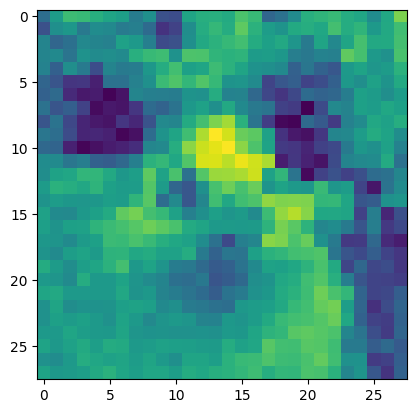

In [ ]:
reconstructed_image = reconstruction[0].detach().cpu().numpy()
reconstructed_image = reconstructed_image.reshape(img_width, img_height)

plt.imshow(reconstructed_image)